# Classification

### Required Software
* Graphviz (We already installed this software at the beginning of semester)

### Classification vs Regression
* Regression is about finding a liner or nonliner function, which **fits** well with the dataset
* Classification is about finding a liner or nonliner function, which **separates** different classes (e.g., good/bad, yes/no, pass/fail, admission/rejection) in y value
<img src="http://ipython-books.github.io/images/ml.png">

## Can healthcare providers use data analytics to predict diseases (e.g., 2nd heart attack) and hospital readmission?

### Dataset
Source: Data Mining for the Masses by Matthew North
    
Sonia has access to the company’s medical claims database. 
With this access, she is able to generate two data sets for us. 
This first is a list of people who have suffered heart attacks, 
with an attribute indicating whether or not they have had more than one; 
and the second is a list of those who have had a first heart attack, but not a second. 
The former data set, comprised of 138 observations, will serve as our training data; while the latter, 
comprised of 690 peoples’ data, will be for scoring. 
Sonia’s hope is to help this latter group of people avoid becoming second heart attack victims. 

In compiling the two data sets we have defined the following attributes: 

* **Age**: The age in years of the person, rounded to the nearest whole year. 
* **Marital_Status**: The person’s current marital status, indicated by a coded number: **0–Single, never married; 1–Married; 2–Divorced; 3–Widowed** 
* **Gender**: The person’s gender: **0 for female; 1 for male**. 
* **Weight_Category**: The person’s weight categorized into one of three levels: **0 for normal weight range; 1 for overweight; and 2 for obese** 
* **Cholesterol**: The person’s cholesterol level, as recorded at the time of their treatment for their most recent heart attack (their only heart attack, in the case of those individuals in the scoring data set. 
* **Stress_Management**: A binary attribute indicating whether or not the person has previously attended a stress management course: **0 for no; 1 for yes**. 
* **Trait_Anxiety**: A score on a scale of **0 to 100** measuring the level of each person’s natural stress levels and abilities to cope with stress. A short time after each person in each of the two data sets had recovered from their first heart attack, they were administered a standard test of natural anxiety. Their scores are tabulated and recorded in this attribute along five point increments. A score of 0 would indicate that the person never feels anxiety, pressure or stress in any situation, while a score of 100 would indicate that the person lives in a constant state of being overwhelmed and unable to deal with his or her circumstances. 
* **2nd_Heart_Attack**: This attribute exists only in the training data set. It will be our label, the prediction or target attribute. In the training data set, the attribute is set to **‘yes’** for individuals who have suffered second heart attacks, and **‘no’** for those who have not.                  

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Loading data

In [83]:
df1=pd.read_csv("data/ts2_cleaned.csv")
print df1.head()

     FAKEID  Y2defect  Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y1price  YEARS  BACKER  \
0  580V74KT         0     0     0     1     1     1       15      8       1   
1  268D25AO         1     1     0     0     0     1       15     11       1   
2  312Q12WV         1     1     0     1     0     1       15      4       0   
3  420R23VB         0     0     0     1     0     0       15      5       0   
4  611B52LL         1     0     0     1     0     0       15      2       0   

   AGE  INCOME  GNDR  OWNHOME  PCTMARR  HOMEVAL  
0   94       4     0        1       77      203  
1   67       2     0        1       50       38  
2   62       4     1        1       60       68  
3   89       4     1        1       65      194  
4   77       0     0        1       54       92  


In [84]:
df1.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7272 entries, 0 to 7271
Data columns (total 16 columns):
FAKEID      7272 non-null object
Y2defect    7272 non-null int64
Y1G5        7272 non-null int64
Y1G4        7272 non-null int64
Y1G3        7272 non-null int64
Y1G2        7272 non-null int64
Y1G1        7272 non-null int64
Y1price     7272 non-null int64
YEARS       7272 non-null int64
BACKER      7272 non-null int64
AGE         7272 non-null int64
INCOME      7272 non-null int64
GNDR        7272 non-null int64
OWNHOME     7272 non-null int64
PCTMARR     7272 non-null int64
HOMEVAL     7272 non-null int64
dtypes: int64(15), object(1)
memory usage: 909.1+ KB


# Data wrangling & ETL: Data cleaningg & transformation

# Exploratory data analysis

In [85]:
# basic statistics
df1.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
count,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000
mean,0.495600,0.342959,0.521177,0.628438,0.291529,0.480336,19.895490,6.376925,0.487624,61.362074,2.882151,0.448570,0.988036,58.718372,109.364411
std,0.500015,0.474731,0.499586,0.483255,0.454498,0.499648,8.746342,2.881749,0.499881,15.481541,1.843857,0.497382,0.108730,12.182229,88.593526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,50.000000,1.000000,0.000000,1.000000,53.000000,55.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,63.000000,3.000000,0.000000,1.000000,61.000000,79.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,73.000000,4.000000,1.000000,1.000000,67.000000,127.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,23.000000,1.000000,97.000000,6.000000,1.000000,1.000000,99.000000,595.000000


In [86]:
# correlation analysis
df1.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.100830,0.035610,-0.039780,-0.112366,-0.142651,-0.007967,-0.130806,-0.182349,-0.021781,0.011297,0.002961,-0.007293,-0.010815,0.028370
Y1G5,-0.100830,1.000000,0.085931,-0.147069,0.111502,0.120048,0.044075,0.117315,0.043968,0.034881,-0.000170,0.003068,-0.011091,-0.002464,0.003542
Y1G4,0.035610,0.085931,1.000000,-0.080767,-0.077467,-0.103292,0.003654,-0.094531,-0.084312,-0.065674,0.009055,0.003830,0.018590,0.003082,-0.006871
Y1G3,-0.039780,-0.147069,-0.080767,1.000000,-0.092855,-0.133931,-0.046120,-0.098812,-0.000251,-0.025326,0.022160,0.000020,0.012234,0.003856,-0.001659
Y1G2,-0.112366,0.111502,-0.077467,-0.092855,1.000000,0.196643,0.058178,0.314802,0.278000,0.096272,-0.015289,-0.005456,-0.018471,0.008174,-0.006864
Y1G1,-0.142651,0.120048,-0.103292,-0.133931,0.196643,1.000000,-0.005348,0.239216,0.252600,0.081348,-0.031850,-0.023163,-0.013192,0.025074,-0.009380
Y1price,-0.007967,0.044075,0.003654,-0.046120,0.058178,-0.005348,1.000000,0.037331,-0.099070,-0.036062,0.080680,0.046819,-0.017946,-0.006266,0.094557
YEARS,-0.130806,0.117315,-0.094531,-0.098812,0.314802,0.239216,0.037331,1.000000,0.530873,0.293647,-0.100790,-0.008591,-0.014576,-0.005007,-0.041782
BACKER,-0.182349,0.043968,-0.084312,-0.000251,0.278000,0.252600,-0.099070,0.530873,1.000000,0.189108,-0.095961,-0.015836,-0.009051,0.020612,-0.069400
AGE,-0.021781,0.034881,-0.065674,-0.025326,0.096272,0.081348,-0.036062,0.293647,0.189108,1.000000,-0.234123,0.017073,-0.057152,-0.055612,-0.013184


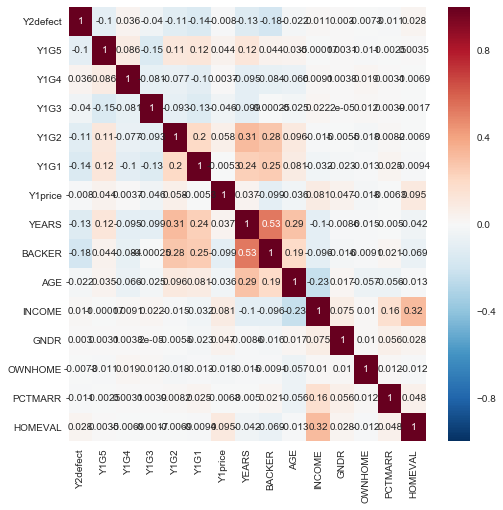

In [87]:
# heatmap for correlation
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(), annot=True)

In [88]:
df = df1
df = df.drop(['FAKEID'], axis=1)
df.head()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,0,0,0,1,1,1,15,8,1,94,4,0,1,77,203
1,1,1,0,0,0,1,15,11,1,67,2,0,1,50,38
2,1,1,0,1,0,1,15,4,0,62,4,1,1,60,68
3,0,0,0,1,0,0,15,5,0,89,4,1,1,65,194
4,1,0,0,1,0,0,15,2,0,77,0,0,1,54,92


# Data visualization & business intelligence
I skip this step to focus on model building. In a real-world project, you should extract business intelligence using data visualization (e.g., groupby, matplotlib, seaborn)


# Model Building (Predictive/Classification analytics)

# Top 10 algorithms & methods used by Data Scientists.

<img src="images/top10algorithms.png">
source: kdnuggets.com

There are many different machine learning algorithms for predictive model building. 

> - **Decision Tree**
> - **Logistic Regression**
> - **k-nearest neighbors**

<h1 align="center">Decision Tree</h1>
* Most intuitive
* Implicitly perform feature selection (selecting which X variables are important)
* Requires little effort from users for data preparation (can handle missing values)
* Easy to interpret and explain to executives!
* Provides decision rules

# Model Building & Validation

When building a predictive model, we split the original data into two datasets: **training dataset and testing (validation) dataset**. This is called **"split validation"**, a type of **"model validation"**
- A predictive model is built using the **training dataset** and **the model quality** is assessed as the model is applied into the **testing (validation) dataset** (See Appendix for more details)

> **Two types of model validation**: 
 1. **split validation** (70% of the original data as training and the other 30% as testing dataset)
 2. **cross validation** (90% of the original data as training and the other 10% as testing dataset): This allows to test the model quality 10 times. The average value is used to measure the model performance

In [89]:
# declare X variables and y variable
y = df['Y2defect']
x = df.drop(['Y2defect'], axis=1)



In [90]:
# evaluate the model by splitting into train (70%) and test sets (30%)
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# name your model as "dt"
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.334, random_state= 2)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [91]:
print x_train.shape, y_train.shape

(4843, 14) (4843,)


In [92]:
print x_test.shape, y_test.shape

(2429, 14) (2429,)


In [93]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html

print metrics.accuracy_score(y_test, dt.predict(x_test))
print metrics.confusion_matrix(y_test, dt.predict(x_test))
# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.550432276657
[[683 570]
 [522 654]]


http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

- Precision = true positives / (true positives + false positives) 
    - The ability of the classifier to not label a negative sample as positive
- Recall = true positives / (true positives + false negatives). 
    - The ability of the classifier to find all positive samples
- f1  = (precision $*$ recall) / (precision + recall)

- confusion matrix: rows are the actual values; columns are the predicted value

- 100% accuracy ... this seems to be overfitting (too good to be true)

# Visualizing decision tree

There are two methods for this. You can use either method. 

- The first option is using Graphviz software. For this option, you need to have GraphViz installed in your mahcine.
- The second option is using **pydotplus**. This creates a pdf file. 
    - for this, install pydotplus first **pip install pydotplus**

In [20]:
# 1st option
tree.export_graphviz(dt, out_file='data/decisiontree.dot', feature_names=x.columns)

In [21]:
from IPython.display import Image
Image("data/decisiontree.png")
# This is a "full-grown" tree 

# Interpreting decision tree

Weight_category appears to be the single most influential factor

Many decision rules can be extracted. For example:

1. if weight_category < 0.5 (meaning normal), 31 people (who in normal weight category) do not have 2nd heart attack.
2. if weight_category > 0.5 (meaning overweight or obese) and Marital_status < 1.5 (meaning single or married) and Trait_Anxiety < 62.5 (meaning low anxiety level), people tend NOT to have 2nd heart attack. 17 people are in this category.
3. develop more decision rules here ...

In [40]:
!pip install pydotplus

In [42]:
# 2nd option
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=x.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt.pdf")
# go to data folder and open the pdf file

InvocationException: GraphViz's executables not found

# What if your decision tree looks too complicated to be practical?
- A "full-grown" decision tree could be too complicated to be practical
- To be useful, a model needs to be simple, but not too simple
- **"Everything Should Be Made as Simple as Possible, But Not Simpler"** - Albert Einstein or ?

# Model Deployement: Make Predictions on the new dataset (scoring dataset)

In [23]:
# scoring dataset
score=pd.read_csv("data/heartattack_Scoring.csv")
score.head(2)
#no Y value in this dataset ... 
#we are trying to predict whether the people in this scoring dataset are likely to have 2nd heart attack or not.

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety
0,61,0,1,1,139,1,50
1,55,2,1,2,163,0,40


In [24]:
predictedY = dt.predict(score)
print predictedY

[0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1
 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1
 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1
 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0
 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0
 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0
 1 1 1 0 0 1 0 1 0 1 1 0 

In [25]:
#combine the predicted Y value with the scoring dataset
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head()

,predicted Y
0,0
1,1
2,0
3,1
4,1


In [26]:
#finally ...
data1 = score.join(predictedY) 
data1.head()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,predicted Y
0,61,0,1,1,139,1,50,0
1,55,2,1,2,163,0,40,1
2,53,1,1,1,172,0,55,0
3,58,1,1,2,206,0,70,1
4,62,2,1,1,148,1,50,1


2nd person (a 55 years old male) is likely to have 2nd heart attack

In [28]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(dt, x, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.92857143  0.85714286  1.          1.          0.78571429  0.92857143
  0.92857143  0.92857143  1.          1.        ]
0.935714285714


# Appendix 2. Model building, evaluation and model selection/deployment in machine learning

# Appendix 3: Random Forest (Ensemble model): Very Important !!!
- This is like **getting opionions from multiple doctors**, not one doctor, for medical diagnosis
- Building **multiple decision trees (ensembled decision trees) with the purpose to improve the model accuracy**
- **RandomForestClassifier**(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)
    - n_estimators = the number of **decision trees** in the forest 
- **Combining different opionions is likely to lead to high accuracy**. 
- The winners of some recent industry data anlytics competitions (e.g., Kaggle.com) happened to use **random forest**. A recent paper "[(Do We Need Hundreds of Classifiers to Solve Real World Classification Problems?)](http://jmlr.csail.mit.edu/papers/volume15/delgado14a/delgado14a.pdf)" published in the Journal of Machine Learning Research shows:

> **Ensembled decision tree (Random Forest) performs the best for most classification problems.**

- "blackbox" algorithm

In [95]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=15)    #building 15 decision trees
clf=clf.fit(x, y)
clf.score(x,y)

0.99298679867986794

In [96]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf.predict(x)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(x))
print metrics.classification_report(y, clf.predict(x))

0.99298679868
[[3646   22]
 [  29 3575]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      3668
          1       0.99      0.99      0.99      3604

avg / total       0.99      0.99      0.99      7272



In [97]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), x.columns))

Features sorted by their rank:
[(0.004, 'OWNHOME'), (0.0197, 'Y1G2'), (0.0257, 'Y1G5'), (0.0284, 'Y1G3'), (0.0303, 'GNDR'), (0.0304, 'BACKER'), (0.0314, 'Y1G4'), (0.0335, 'Y1G1'), (0.0409, 'Y1price'), (0.0929, 'INCOME'), (0.1191, 'YEARS'), (0.1717, 'AGE'), (0.1769, 'PCTMARR'), (0.1951, 'HOMEVAL')]


Weight_Category appears to be an important predictor

In [98]:
# another method
pd.DataFrame({'feature':x.columns, 'importance':clf.feature_importances_})

,feature,importance
0,Y1G5,0.025748
1,Y1G4,0.031366
2,Y1G3,0.028361
3,Y1G2,0.019732
4,Y1G1,0.033537
5,Y1price,0.040870
6,YEARS,0.119127
7,BACKER,0.030377
8,AGE,0.171744
9,INCOME,0.092925


In [99]:
#Predict class probabilities for X
clf.predict_proba(x)
# 1st value: the probability of NO
# 2nd value: the probability of YES 

array([[ 0.8       ,  0.2       ],
       [ 0.33333333,  0.66666667],
       [ 0.33333333,  0.66666667],
       ..., 
       [ 0.2       ,  0.8       ],
       [ 0.33333333,  0.66666667],
       [ 0.73333333,  0.26666667]])

### Make predictions on the new dataset (scoring dataset without y value)

In [ ]:
score=pd.read_csv("data/heartattack_scoring.csv")
output_scoring = clf.predict(score)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted 2nd Heart Attack'])

probs = clf.predict_proba(score)
probs = pd.DataFrame(probs, columns=['prob of NO', 'prob of YES'])

risky_patients = predicted_y.join(probs)

risky_patients.to_csv("data/output_heartattack_RandomForest_ScoringDataset.csv")

In [1]:
y = df['2nd_Heart_Attack']
X = df.drop(['2nd_Heart_Attack'], axis=1)

# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#This is ROC chart based on the testing dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test,dt.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, dt.predict(X_test))

NameError: name 'df' is not defined

# KNN Model

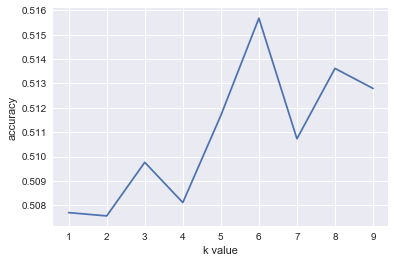

In [100]:
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, x, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')

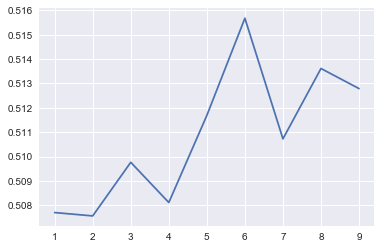

In [101]:
from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x, y)
# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [102]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.515676567657
{'n_neighbors': 6}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


# Logist Regression

In [103]:
df2 = df1
df2.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,1,77,203
1,268D25AO,1,1,0,0,0,1,15,11,1,67,2,0,1,50,38
2,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,1,60,68
3,420R23VB,0,0,0,1,0,0,15,5,0,89,4,1,1,65,194
4,611B52LL,1,0,0,1,0,0,15,2,0,77,0,0,1,54,92


In [104]:
Y1G5_dummies = pd.get_dummies(df2['Y1G5'], prefix='Y1G5')
Y1G4_dummies = pd.get_dummies(df2['Y1G4'], prefix='Y1G4')
Y1G3_dummies = pd.get_dummies(df2['Y1G3'], prefix='Y1G3')
Y1G2_dummies = pd.get_dummies(df2['Y1G2'], prefix='Y1G2')
Y1G1_dummies = pd.get_dummies(df2['Y1G1'], prefix='Y1G1')
BACKER_dummies = pd.get_dummies(df2['BACKER'], prefix='BACKER')
GNDR_dummies = pd.get_dummies(df2['GNDR'], prefix='GNDR')
OWNHOME_dummies = pd.get_dummies(df2['OWNHOME'], prefix='OWNHOME')
df_new = pd.concat([df, Y1G5_dummies, Y1G4_dummies, Y1G3_dummies, Y1G2_dummies, Y1G1_dummies, BACKER_dummies, GNDR_dummies, OWNHOME_dummies], axis=1)
df_new.head(1)

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,...,Y1G2_0,Y1G2_1,Y1G1_0,Y1G1_1,BACKER_0,BACKER_1,GNDR_0,GNDR_1,OWNHOME_0,OWNHOME_1
0,0,0,0,1,1,1,15,8,1,94,...,0,1,0,1,0,1,1,0,0,1


In [128]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7272 entries, 0 to 7271
Data columns (total 31 columns):
Y2defect     7272 non-null int64
Y1G5         7272 non-null int64
Y1G4         7272 non-null int64
Y1G3         7272 non-null int64
Y1G2         7272 non-null int64
Y1G1         7272 non-null int64
Y1price      7272 non-null int64
YEARS        7272 non-null int64
BACKER       7272 non-null int64
AGE          7272 non-null int64
INCOME       7272 non-null int64
GNDR         7272 non-null int64
OWNHOME      7272 non-null int64
PCTMARR      7272 non-null int64
HOMEVAL      7272 non-null int64
Y1G5_0       7272 non-null uint8
Y1G5_1       7272 non-null uint8
Y1G4_0       7272 non-null uint8
Y1G4_1       7272 non-null uint8
Y1G3_0       7272 non-null uint8
Y1G3_1       7272 non-null uint8
Y1G2_0       7272 non-null uint8
Y1G2_1       7272 non-null uint8
Y1G1_0       7272 non-null uint8
Y1G1_1       7272 non-null uint8
BACKER_0     7272 non-null uint8
BACKER_1     7272 non-null uint8
GN

In [105]:
df_new.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,...,Y1G2_0,Y1G2_1,Y1G1_0,Y1G1_1,BACKER_0,BACKER_1,GNDR_0,GNDR_1,OWNHOME_0,OWNHOME_1
Y2defect,1.000000,-0.100830,0.035610,-0.039780,-0.112366,-0.142651,-0.007967,-0.130806,-0.182349,-0.021781,...,0.112366,-0.112366,0.142651,-0.142651,0.182349,-0.182349,-0.002961,0.002961,0.007293,-0.007293
Y1G5,-0.100830,1.000000,0.085931,-0.147069,0.111502,0.120048,0.044075,0.117315,0.043968,0.034881,...,-0.111502,0.111502,-0.120048,0.120048,-0.043968,0.043968,-0.003068,0.003068,0.011091,-0.011091
Y1G4,0.035610,0.085931,1.000000,-0.080767,-0.077467,-0.103292,0.003654,-0.094531,-0.084312,-0.065674,...,0.077467,-0.077467,0.103292,-0.103292,0.084312,-0.084312,-0.003830,0.003830,-0.018590,0.018590
Y1G3,-0.039780,-0.147069,-0.080767,1.000000,-0.092855,-0.133931,-0.046120,-0.098812,-0.000251,-0.025326,...,0.092855,-0.092855,0.133931,-0.133931,0.000251,-0.000251,-0.000020,0.000020,-0.012234,0.012234
Y1G2,-0.112366,0.111502,-0.077467,-0.092855,1.000000,0.196643,0.058178,0.314802,0.278000,0.096272,...,-1.000000,1.000000,-0.196643,0.196643,-0.278000,0.278000,0.005456,-0.005456,0.018471,-0.018471
Y1G1,-0.142651,0.120048,-0.103292,-0.133931,0.196643,1.000000,-0.005348,0.239216,0.252600,0.081348,...,-0.196643,0.196643,-1.000000,1.000000,-0.252600,0.252600,0.023163,-0.023163,0.013192,-0.013192
Y1price,-0.007967,0.044075,0.003654,-0.046120,0.058178,-0.005348,1.000000,0.037331,-0.099070,-0.036062,...,-0.058178,0.058178,0.005348,-0.005348,0.099070,-0.099070,-0.046819,0.046819,0.017946,-0.017946
YEARS,-0.130806,0.117315,-0.094531,-0.098812,0.314802,0.239216,0.037331,1.000000,0.530873,0.293647,...,-0.314802,0.314802,-0.239216,0.239216,-0.530873,0.530873,0.008591,-0.008591,0.014576,-0.014576
BACKER,-0.182349,0.043968,-0.084312,-0.000251,0.278000,0.252600,-0.099070,0.530873,1.000000,0.189108,...,-0.278000,0.278000,-0.252600,0.252600,-1.000000,1.000000,0.015836,-0.015836,0.009051,-0.009051
AGE,-0.021781,0.034881,-0.065674,-0.025326,0.096272,0.081348,-0.036062,0.293647,0.189108,1.000000,...,-0.096272,0.096272,-0.081348,0.081348,-0.189108,0.189108,-0.017073,0.017073,0.057152,-0.057152


In [107]:
#declare X variables and y variable
y = df_new['Y2defect']
X = df_new.drop(['Y2defect', 'Y1G5', 'Y1G4', 'Y1G3', 'Y1G2', 'Y1G1', 'BACKER', 'GNDR', 'OWNHOME',
                 'Y1G5_0', 'Y1G4_0', 'Y1G3_0', 'Y1G2_0', 'Y1G1_0','BACKER_0', 'GNDR_0', 'OWNHOME_0'], axis=1)

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.334, random_state= 2)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [109]:
print metrics.accuracy_score(y_test, dt.predict(x_test))
print metrics.confusion_matrix(y_test, dt.predict(x_test))

0.542610127625
[[677 576]
 [535 641]]


In [110]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(dt, x, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.54807692  0.5467033   0.53296703  0.56318681  0.55295736  0.55158184
  0.55708391  0.55020633  0.56060606  0.5523416 ]
0.551571116037


In [111]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=15)    #building 15 decision trees
clf=clf.fit(x, y)
clf.score(x,y)

0.99408690869086913

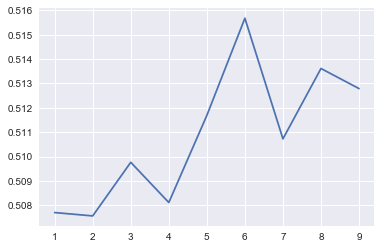

In [112]:
#KNN
knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x, y)
# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [113]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.515676567657
{'n_neighbors': 6}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


In [121]:
# Logist Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
print metrics.accuracy_score(y_test, lr.predict(x_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(x_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(x_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, lr.predict(x_test))

0.610539316591
--------------------------------------------------------
[[770 483]
 [463 713]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.62      0.61      0.62      1253
          1       0.60      0.61      0.60      1176

avg / total       0.61      0.61      0.61      2429

--------------------------------------------------------
0.610408828336


In [123]:
# we use statsmodels for logit function
logit = sm.Logit(y, x) 
model_logit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.664112
         Iterations 4


In [124]:
for i in model_logit.predict():
    print i

0.396127497446
0.347204379484
0.437389128221
0.672024389349
0.650912082746
0.718154786972
0.451120758802
0.499590861926
0.620701248487
0.475240276521
0.399883703241
0.414828898533
0.636922372427
0.465332610273
0.464877678284
0.60421045482
0.448245442157
0.24627616809
0.339404371492
0.636421001276
0.487887528226
0.63600551812
0.339574704978
0.258663896453
0.537029616127
0.695698150908
0.369943341916
0.523203517406
0.343523711788
0.317246676857
0.347995018932
0.527173317281
0.350830688889
0.410164380261
0.674194841107
0.5116459611
0.361700854513
0.653244298295
0.420310380734
0.461552033558
0.555127615843
0.601600909845
0.299461522425
0.558963594214
0.325167373304
0.420161156084
0.593345699678
0.320423794316
0.654630133393
0.481486481201
0.418888556715
0.60006844887
0.325776883059
0.357839137799
0.632550838565
0.384492852823
0.575244577134
0.627272606165
0.637434340904
0.427888381056
0.349010189133
0.583740543183
0.604172872428
0.634924402489
0.72058997702
0.460869274618
0.357494131757
0.

0.702958254891
0.271789593077
0.471054709536
0.669126481579
0.623564356211
0.292141200715
0.312080447275
0.402587455812
0.542574088009
0.414516835874
0.431434590051
0.604046634674
0.669087883424
0.376955016525
0.321045016572
0.405352753662
0.509444045721
0.57447187539
0.630508352253
0.624862742137
0.456258268852
0.636485706204
0.627207813486
0.470751572484
0.630166197569
0.383994231673
0.429294154085
0.327413156984
0.426324392217
0.641750673665
0.512901480711
0.33973912249
0.468804486423
0.585623886344
0.619165820366
0.576323440052
0.375729348665
0.344634716563
0.34878626922
0.489259924291
0.401479610049
0.296826355785
0.645771965805
0.524438552487
0.666815941182
0.641404500972
0.489755778678
0.602752634583
0.406538513237
0.534413604049
0.492328693609
0.295903487873
0.462247764651
0.254508032928
0.683549363812
0.649936551198
0.237912668727
0.624278166917
0.491864320858
0.660638903387
0.483548310389
0.629559697282
0.547274244317
0.334520153106
0.654975523392
0.27605230243
0.670044497971

0.732271981991
0.628823986904
0.458566018256
0.473055463943
0.333984943966
0.640366191825
0.348808327744
0.557288599044
0.511045185698
0.465596497384
0.365709578293
0.632736129932
0.375441170602
0.53466077021
0.408805584108
0.424757898351
0.552597186063
0.407322291895
0.544808675768
0.626926535041
0.505887015974
0.486224872795
0.444404572063
0.468568767527
0.515813077707
0.473773478715
0.426019860826
0.49788729944
0.532789478269
0.482083332976
0.256883027985
0.372159522659
0.32342486
0.477844525457
0.442222807296
0.498115827401
0.574141026402
0.609897830677
0.449048770377
0.429931731159
0.511594775395
0.500109425349
0.401653121421
0.677600889377
0.309840851917
0.619134749785
0.500636966348
0.562187321837
0.683247477234
0.511792507067
0.481805097548
0.372613297004
0.370322923086
0.445544655724
0.39640524446
0.431152647626
0.554185366079
0.629833210903
0.364269807155
0.488929388627
0.604888876362
0.605241309716
0.487735558683
0.480294247489
0.480000855267
0.454532516099
0.494356314849
0.

0.396570267849
0.329697164162
0.444262212375
0.639494894156
0.33735266211
0.662192126869
0.596704644162
0.65029252544
0.511638608262
0.593431798467
0.61030193075
0.507955878138
0.256880119045
0.470602636999
0.405012451334
0.613935804124
0.432545182076
0.610478991448
0.395077112818
0.681578504556
0.472581761
0.35169837526
0.609476469765
0.536832185022
0.45685351041
0.6158382903
0.456719334053
0.594162541516
0.605326254554
0.477004905159
0.473026982488
0.543539389109
0.506189964215
0.582248805446
0.29199040777
0.457486804188
0.360936818101
0.600978123166
0.627864365198
0.399894488207
0.406474988831
0.420919841349
0.457196325743
0.260785865712
0.496849917462
0.51245472614
0.376275549067
0.637230358692
0.315858004726
0.485965634099
0.646289453104
0.575275195338
0.608183761146
0.725853575265
0.333660358371
0.426070649548
0.569886600506
0.275236947908
0.534561683601
0.518588149333
0.384808704629
0.383781063209
0.308883499283
0.465525890708
0.583784256982
0.362631317191
0.6444123686
0.3358733

In [125]:
print model_logit.summary()

                           Logit Regression Results                           
Dep. Variable:               Y2defect   No. Observations:                 7272
Model:                          Logit   Df Residuals:                     7258
Method:                           MLE   Df Model:                           13
Date:                Mon, 09 Apr 2018   Pseudo R-squ.:                 0.04184
Time:                        20:43:01   Log-Likelihood:                -4829.4
converged:                       True   LL-Null:                       -5040.3
                                        LLR p-value:                 5.734e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Y1price       -0.0025      0.003     -0.899      0.369      -0.008       0.003
YEARS         -0.0148      0.010     -1.411      0.158      -0.035       0.006
AGE            0.0053      0.002      3.397      0.0

In [126]:
model_logit.pred_table()

array([[ 2273.,  1395.],
       [ 1539.,  2065.]])

In [127]:
print model_logit.conf_int()

                  0         1
Y1price   -0.007898  0.002933
YEARS     -0.035382  0.005762
AGE        0.002244  0.008362
INCOME    -0.028320  0.027990
PCTMARR   -0.001696  0.005602
HOMEVAL   -0.000023  0.001111
Y1G5_1    -0.483638 -0.278532
Y1G4_1    -0.022790  0.169011
Y1G3_1    -0.385536 -0.185414
Y1G2_1    -0.327878 -0.103370
Y1G1_1    -0.481299 -0.281463
BACKER_1  -0.668372 -0.438791
GNDR_1    -0.096927  0.094543
OWNHOME_1  0.133464  0.689696


- accuracy  (2273+2065)/7272=0.59653

# Modely Deployment : Make Predictions on the new data

In [62]:
score=pd.read_csv("data/sport_test.csv")
score.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,0,1,0.0,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,0,,0.0,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,0,0,NaN,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,0,1,NaN,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,1,1,0.0,65,110


In [64]:
score_X = score.drop(['FAKEID', 'Y3defect'], axis=1)
score_X.head(2)

,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,0,0,1,1,0,15,5,0,49.0,4,0,1,0.0,66,64
1,1,1,1,1,1,25,9,1,84.0,5,0,,0.0,67,128


In [67]:
score_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 15 columns):
Y2G5       9542 non-null int64
Y2G4       9542 non-null int64
Y2G3       9542 non-null int64
Y2G2       9542 non-null int64
Y2G1       9542 non-null int64
Y2price    9542 non-null int64
YEARS      9542 non-null int64
BACKER     9542 non-null int64
AGE        7055 non-null float64
INCOME     9542 non-null object
GNDR       9542 non-null object
OWNHOME    9542 non-null object
SPORT      4180 non-null float64
PCTMARR    9542 non-null int64
HOMEVAL    9542 non-null int64
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


In [66]:
output_scoring = dt.predict(score_X)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted 2nd Heart Attack'])
predicted_y

ValueError: could not convert string to float: 